94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 21s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,112,770 (91.98 MB)

 Trainable params: 525,058 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.5264 - loss: 0.8406 - val_accuracy: 0.5216 - val_loss: 0.6429
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.5950 - loss: 0.6743 - val_accuracy: 0.6537 - val_loss: 0.6353
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.6655 - loss: 0.6258 - val_accuracy: 0.7586 - val_loss: 0.5786
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.6661 - loss: 0.6070 - val_accuracy: 0.7572 - val_loss: 0.5658
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.6993 - loss: 0.5983 - val_accuracy: 0.7586 - val_loss: 0.5517
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.6571 - loss: 0.6086 - val_accuracy: 0.7557 - val_loss: 0.5356
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.6999 - loss: 0.5903 - val_accuracy: 0.7572 - val_loss: 0.5276
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.7194 - loss: 0.5832 - val_accuracy: 0.7572 - val_lo

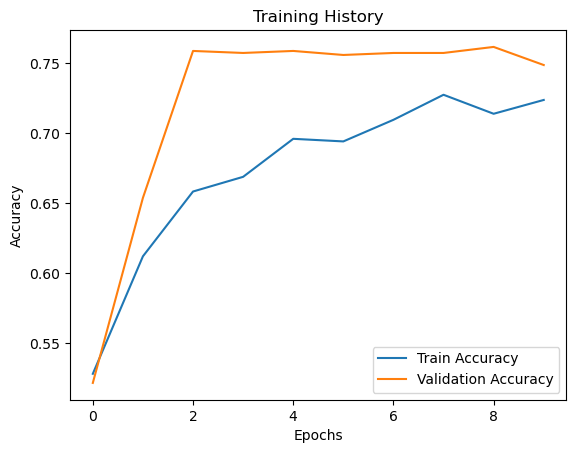

22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.7955 - loss: 0.4861
Validation Accuracy: 74.86%
22/22 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step


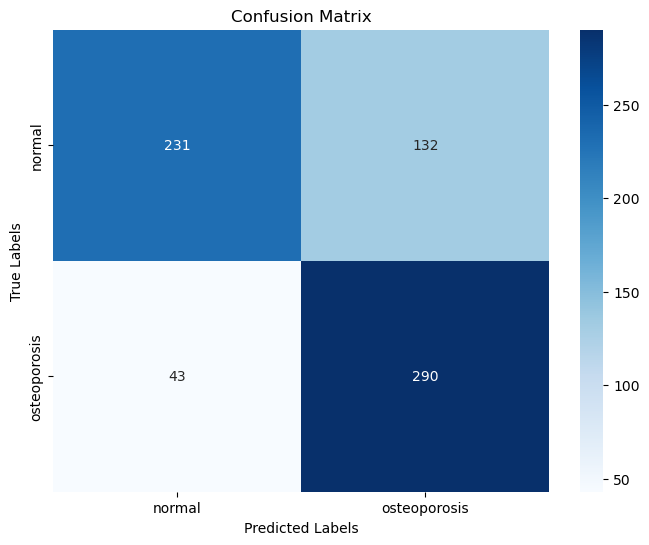

Accuracy: 74.86%
Precision: 0.77
Recall: 0.75
F1-Score: 0.75


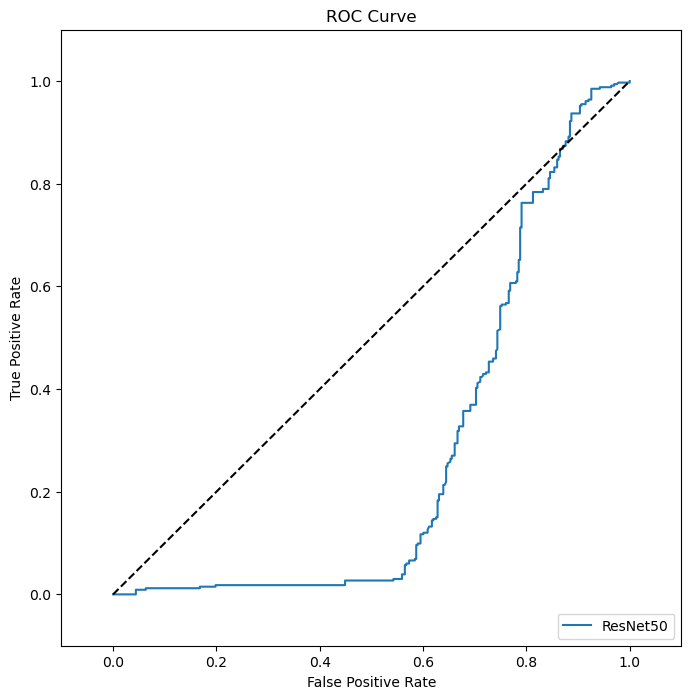

In [1]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve
from sklearn.utils import shuffle
from keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Constants
path = './dataset/'  
tar = 2  # Number of classes
lr = 0.0004  # Learning rate
batch_size = 32  # Batch size
img_size = (224, 224)  # Image size

# Class label mapping
label_mapping = {'normal': 0, 'osteoporosis': 1}

# Function to load and preprocess images
def load_images_and_labels(path, label_mapping):
    images, labels = [], []
    for label_name, label_value in label_mapping.items():
        class_dir = os.path.join(path, label_name)
        if os.path.isdir(class_dir):
            for img_file in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_file)
                img = load_img(img_path, target_size=img_size)
                img_array = img_to_array(img) / 255.0  # Normalize pixel values
                images.append(img_array)
                labels.append(label_value)
    return np.array(images), np.array(labels)

# Load dataset
train_files, train_labels = load_images_and_labels(path, label_mapping)

# Shuffle the data
train_files, train_labels = shuffle(train_files, train_labels, random_state=42)

# One-hot encode labels
train_targets = to_categorical(train_labels, num_classes=tar)

# Split dataset into training and validation sets
train_tensors, val_tensors, train_labels, val_labels = train_test_split(
    train_files, train_targets, test_size=0.3, random_state=42
)

# Load the pre-trained ResNet50 model (without the top layer)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of ResNet50
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Reduce the feature map to a single vector
    Dense(256, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Prevent overfitting
    Dense(tar, activation='softmax')  # Output layer with `tar` classes
])

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=lr),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

# Training the ResNet model
hist = model.fit(
    train_tensors, train_labels,
    validation_data=(val_tensors, val_labels),
    epochs=10,
    batch_size=batch_size,
    callbacks=[ModelCheckpoint('resnet_model.keras', save_best_only=True, monitor='val_loss')]
)

# Plot training history
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training History')
plt.show()

# Evaluate the model on the validation dataset
val_loss, val_acc = model.evaluate(val_tensors, val_labels)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

# Predictions on the validation set
y_pred = model.predict(val_tensors)
cm = confusion_matrix(np.argmax(val_labels, axis=1), np.argmax(y_pred, axis=1))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



# Metrics
accuracycnn = accuracy_score(np.argmax(val_labels, axis=1), np.argmax(y_pred, axis=1))
precisioncnn = precision_score(np.argmax(val_labels, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recallscorecnn = recall_score(np.argmax(val_labels, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1scorecnn = f1_score(np.argmax(val_labels, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print(f"Accuracy: {accuracycnn * 100:.2f}%")
print(f"Precision: {precisioncnn:.2f}")
print(f"Recall: {recallscorecnn:.2f}")
print(f"F1-Score: {f1scorecnn:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(np.argmax(val_labels, axis=1), np.max(y_pred, axis=1))
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label='ResNet50')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Save the model
model.save('resnet_trained_model.h5')
